In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"

NameError: name 'Path' is not defined

In [112]:
# Papermill parameter cell
# Name of the directory to analyse. Should contain consumption_action.csv and consumption_reward.csv.
ANALYSIS_DIR_NAME = ""

In [95]:
path = "../data/"
reward_prefix = "wholesale_reward.csv"
action_prefix = "wholeale_action.csv"

In [114]:
ANALYSIS_DIR = DATA_DIR / ANALYSIS_DIR_NAME

NameError: name 'DATA_DIR' is not defined

### Reward analysis

In [242]:
df_reward = pd.read_csv(os.path.join(path+reward_prefix))


In [97]:
# Fixes the issue that the experiment scheduler always assigns the same gameId
def write_unique_game_id(df):
    new_game_start_indices = df[df["timeslot"] < df["timeslot"].shift()].index
    if len(new_game_start_indices) > 0:
        df.loc[: new_game_start_indices[0], "gameId"] = f"game0"
        for i in range(len(new_game_start_indices) - 1):
            df.loc[new_game_start_indices[i] : new_game_start_indices[i + 1], "gameId"] = f"game{i + 1}"
        df.loc[new_game_start_indices[-1] :, "gameId"] = f"game{len(new_game_start_indices)}"

In [194]:
df_reward = write_unique_game_id(df_reward)
df_reward

KeyError: 'timeslot'

In [243]:
df_reward_rolling = df_reward["reward"].rolling(20).mean().dropna()
df_balancing_reward = df_reward["balancing_reward"].rolling(5).mean().dropna()
df_wholesale_reward = df_reward["wholesale_reward"].rolling(5).mean().dropna()
df_tariff_reward = df_reward["tariff_reward"].rolling(1).mean().dropna()
#df_shaped = df_reward["shaped_return"].rolling(20).mean().dropna()

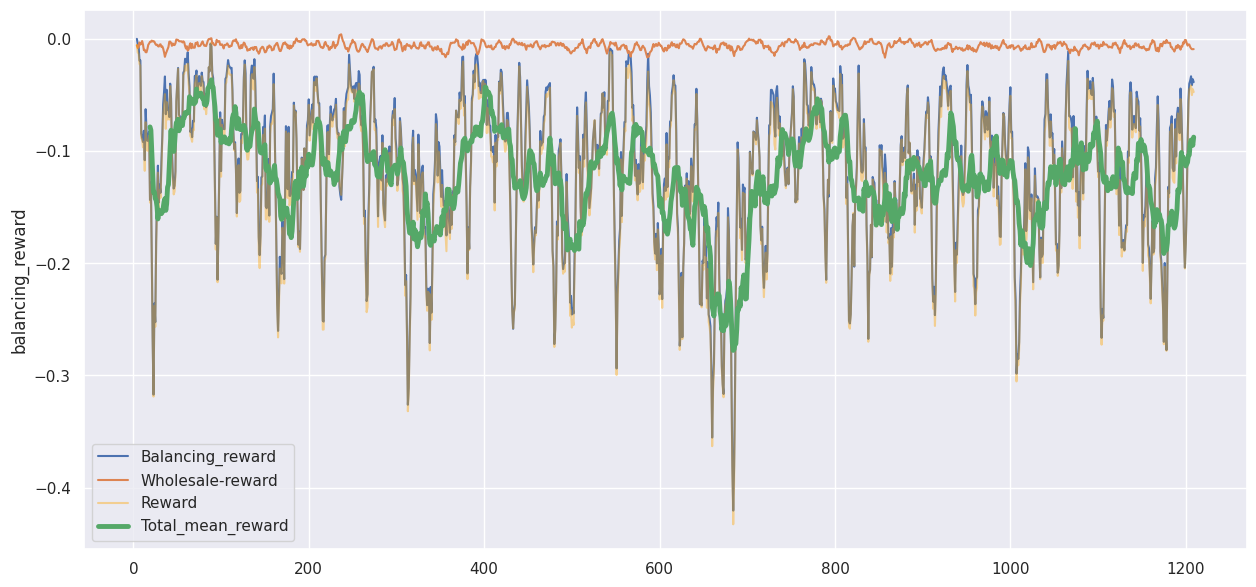

In [244]:

sns.set_theme()
sns.axes_style("darkgrid")
f, axs = plt.subplots(1, 1)

graph3 = sns.lineplot(x=df_balancing_reward.index, y=df_balancing_reward, ax=axs, label="Balancing_reward")
graph4 = sns.lineplot(x=df_wholesale_reward.index, y=df_wholesale_reward, ax=axs,label="Wholesale-reward")
#graph5 = sns.lineplot(x=df_tariff_reward.index, y=df_tariff_reward, ax=axs, label="Tariff_reward")
#graph6 = sns.lineplot(x=df_shaped.index, y=df_shaped, ax=axs, label="Shaped_reward", color="green")
graph7 = sns.lineplot(x=df_reward.index, y=df_reward["reward"].rolling(5).mean(), color="orange", ax=axs, alpha=0.4, label="Reward")
graph2 = sns.lineplot(x=df_reward_rolling.index, y=df_reward_rolling, ax=axs, label="Total_mean_reward", linewidth= 3.5)
axs.legend()
f.set_figwidth(15)
f.set_figheight(7)

### Action analysis

In [255]:
df_reward.dropna(inplace=True) # Drop first few timesteps that have no action. 
df_reward2 = df_reward["observation"].apply(json.loads)
col_names = list(df_reward2.iloc[0].keys())
df_reward2 = df_reward2.apply(lambda x: list(x.values()))
temp_list = []
for row in df_reward2:

    temp_list.append(row)

temp_df = pd.DataFrame(temp_list, columns=col_names)

In [256]:
temp_df

,gameId,timeslot,p_grid_imbalance,p_customer_prosumption,p_wholesale_price,p_cloud_cover,p_temperature,p_wind_speed,cleared_orders_price,cleared_orders_energy,cleared_trade_price,cleared_trade_energy,customer_count,total_prosumption,market_position,hour_of_day,day_of_week
0,is3start9,362,"[7813.64892578125, 6183.26123046875, 12970.433...","[-2841.6181640625, -4805.939453125, -6270.8427...","[71.18484819765432, 43.94330273975598, 47.7731...","[0.335, 0.833, 0.945, 0.572, 0.957, 0.68, 0.95...","[12.6, 10.0, 10.1, 9.9, 10.8, 10.5, 11.9, 11.9...","[6.07, 6.95, 5.9, 5.92, 6.85, 6.66, 6.4, 5.79,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[30.375393810251012, 27.818866929548317, 8.109...","[1.4744100000000344, 0.577269000000058, 0.0635...",0,-26852.277110,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
1,is3start9,363,"[5757.65966796875, 9371.08203125, 11182.771484...","[-778.9189453125, -2113.76953125, -4373.105468...","[72.20905389237177, 46.60301526106637, 49.8646...","[0.96, 0.958, 0.82, 0.947, 0.582, 0.93, 0.704,...","[12.1, 10.0, 10.1, 9.8, 10.4, 10.4, 11.1, 11.9...","[4.07, 5.95, 6.9, 5.92, 5.85, 6.66, 6.4, 6.79,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,-33668.893943,"[14.803999900817871, -0.577269000000058, 42.87...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
2,is3start9,364,"[1638.24169921875, 6768.60107421875, 11997.337...","[-1677.03759765625, -3622.59375, -5414.6171875...","[73.79597557929797, 48.01235518010218, 42.7601...","[0.0, 0.958, 0.945, 0.822, 0.957, 0.555, 0.954...","[12.2, 10.1, 10.1, 9.8, 10.3, 10.0, 11.0, 11.1...","[6.07, 5.95, 5.9, 6.92, 5.85, 5.66, 6.4, 6.79,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,-39966.657674,"[10.569681721740665, 42.8772087097168, 36.7969...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
3,is3start9,365,"[4817.64501953125, 11570.45703125, 16758.97851...","[-1854.57080078125, -3482.89013671875, -5080.7...","[75.35309835273954, 35.33931937248705, 36.3128...","[0.0, 0.958, 0.945, 0.947, 0.832, 0.93, 0.579,...","[12.5, 10.3, 10.2, 9.8, 10.3, 9.9, 10.6, 11.0,...","[6.07, 5.95, 5.9, 5.92, 6.85, 5.66, 5.4, 6.79,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,-43354.601521,"[42.8772087097168, 36.796974182128906, -39.596...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
4,is3start9,366,"[7799.23974609375, 15611.724609375, 19713.7382...","[-2957.80517578125, -4460.03125, -5882.5830078...","[64.12117694401758, 31.5554637395968, 48.58247...","[0.0, 0.958, 0.945, 0.947, 0.957, 0.805, 0.954...","[13.2, 10.4, 10.4, 9.9, 10.3, 9.9, 10.5, 10.6,...","[6.07, 4.95, 5.9, 5.92, 5.85, 6.66, 5.4, 5.79,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,-29455.259212,"[36.796974182128906, -39.59614401500188, 44.33...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,is3start9,1567,"[-3835.554931640625, -1643.96826171875, -3672....","[-15709.265625, -14878.5732421875, -12608.0, -...","[9.692401262013398, -0.18762058338641197, -2.0...","[0.968, 

In [257]:
temp_merge_df = pd.DataFrame()
for column in temp_df.columns:
    if type(temp_df[column].iloc[0]) == list:
        print("ya")
    else:
        temp_merge_df[column] = temp_df[column]


ya
ya
ya
ya
ya
ya
ya
ya
ya
ya
ya
ya
ya


In [258]:
pd.DataFrame(temp_merge_df)

,gameId,timeslot,customer_count,total_prosumption
0,is3start9,362,0,-26852.277110
1,is3start9,363,0,-33668.893943
2,is3start9,364,0,-39966.657674
3,is3start9,365,0,-43354.601521
4,is3start9,366,0,-29455.259212
...,...,...,...,...
1205,is3start9,1567,32475,-81135.324694
1206,is3start9,1568,32475,-72253.513432
1207,is3start9,1569,32475,-59415.808198
1208,is3start9,1570,32475,-55264.109970


In [123]:
temp = []
for row in test:
    test_row= json.loads(row)
    break

In [124]:
from typing import List

temp_row = []
test_row.get("gameId")
i=0
for row in test:

    test_row=json.loads(row)
    for x in test_row:

        
        temp_row.append(test_row[x])




tempdf = pd.DataFrame(np.array(temp_row).reshape((-1,17)))


    

NameError: name 'test_row' is not defined

In [ ]:
list_columns = [2,3,4,5,6,7,8,9,10,11,14,15,16]

new_df = pd.DataFrame()

for x in list_columns:

    y = pd.DataFrame(tempdf[x].tolist())



In [125]:
lista = [1,2,3,4,5]
tempdf[lista].columns

NameError: name 'tempdf' is not defined

In [ ]:
tempdf.explode(2,)

NameError: name 'tempdf' is not defined

In [126]:
test.apply(lambda x: print(json.loads(x)).get("gameId"))



Series([], Name: observation, dtype: object)

In [7]:
from numpy import result_type
col_names = []
price = []
energy = []
for i in range(24):
    col_names.append(f"energy_{i+1}")
    col_names.append(f"price_{i+1}")
    price.append(f"price_{i+1}")
    energy.append(f"energy_{i+1}")


df_action = df_reward.apply(lambda x: x["last_action"].split(";"), result_type="expand", axis=1).drop(0, axis=1)
df_action = df_action.astype(float)
df_action.columns = col_names

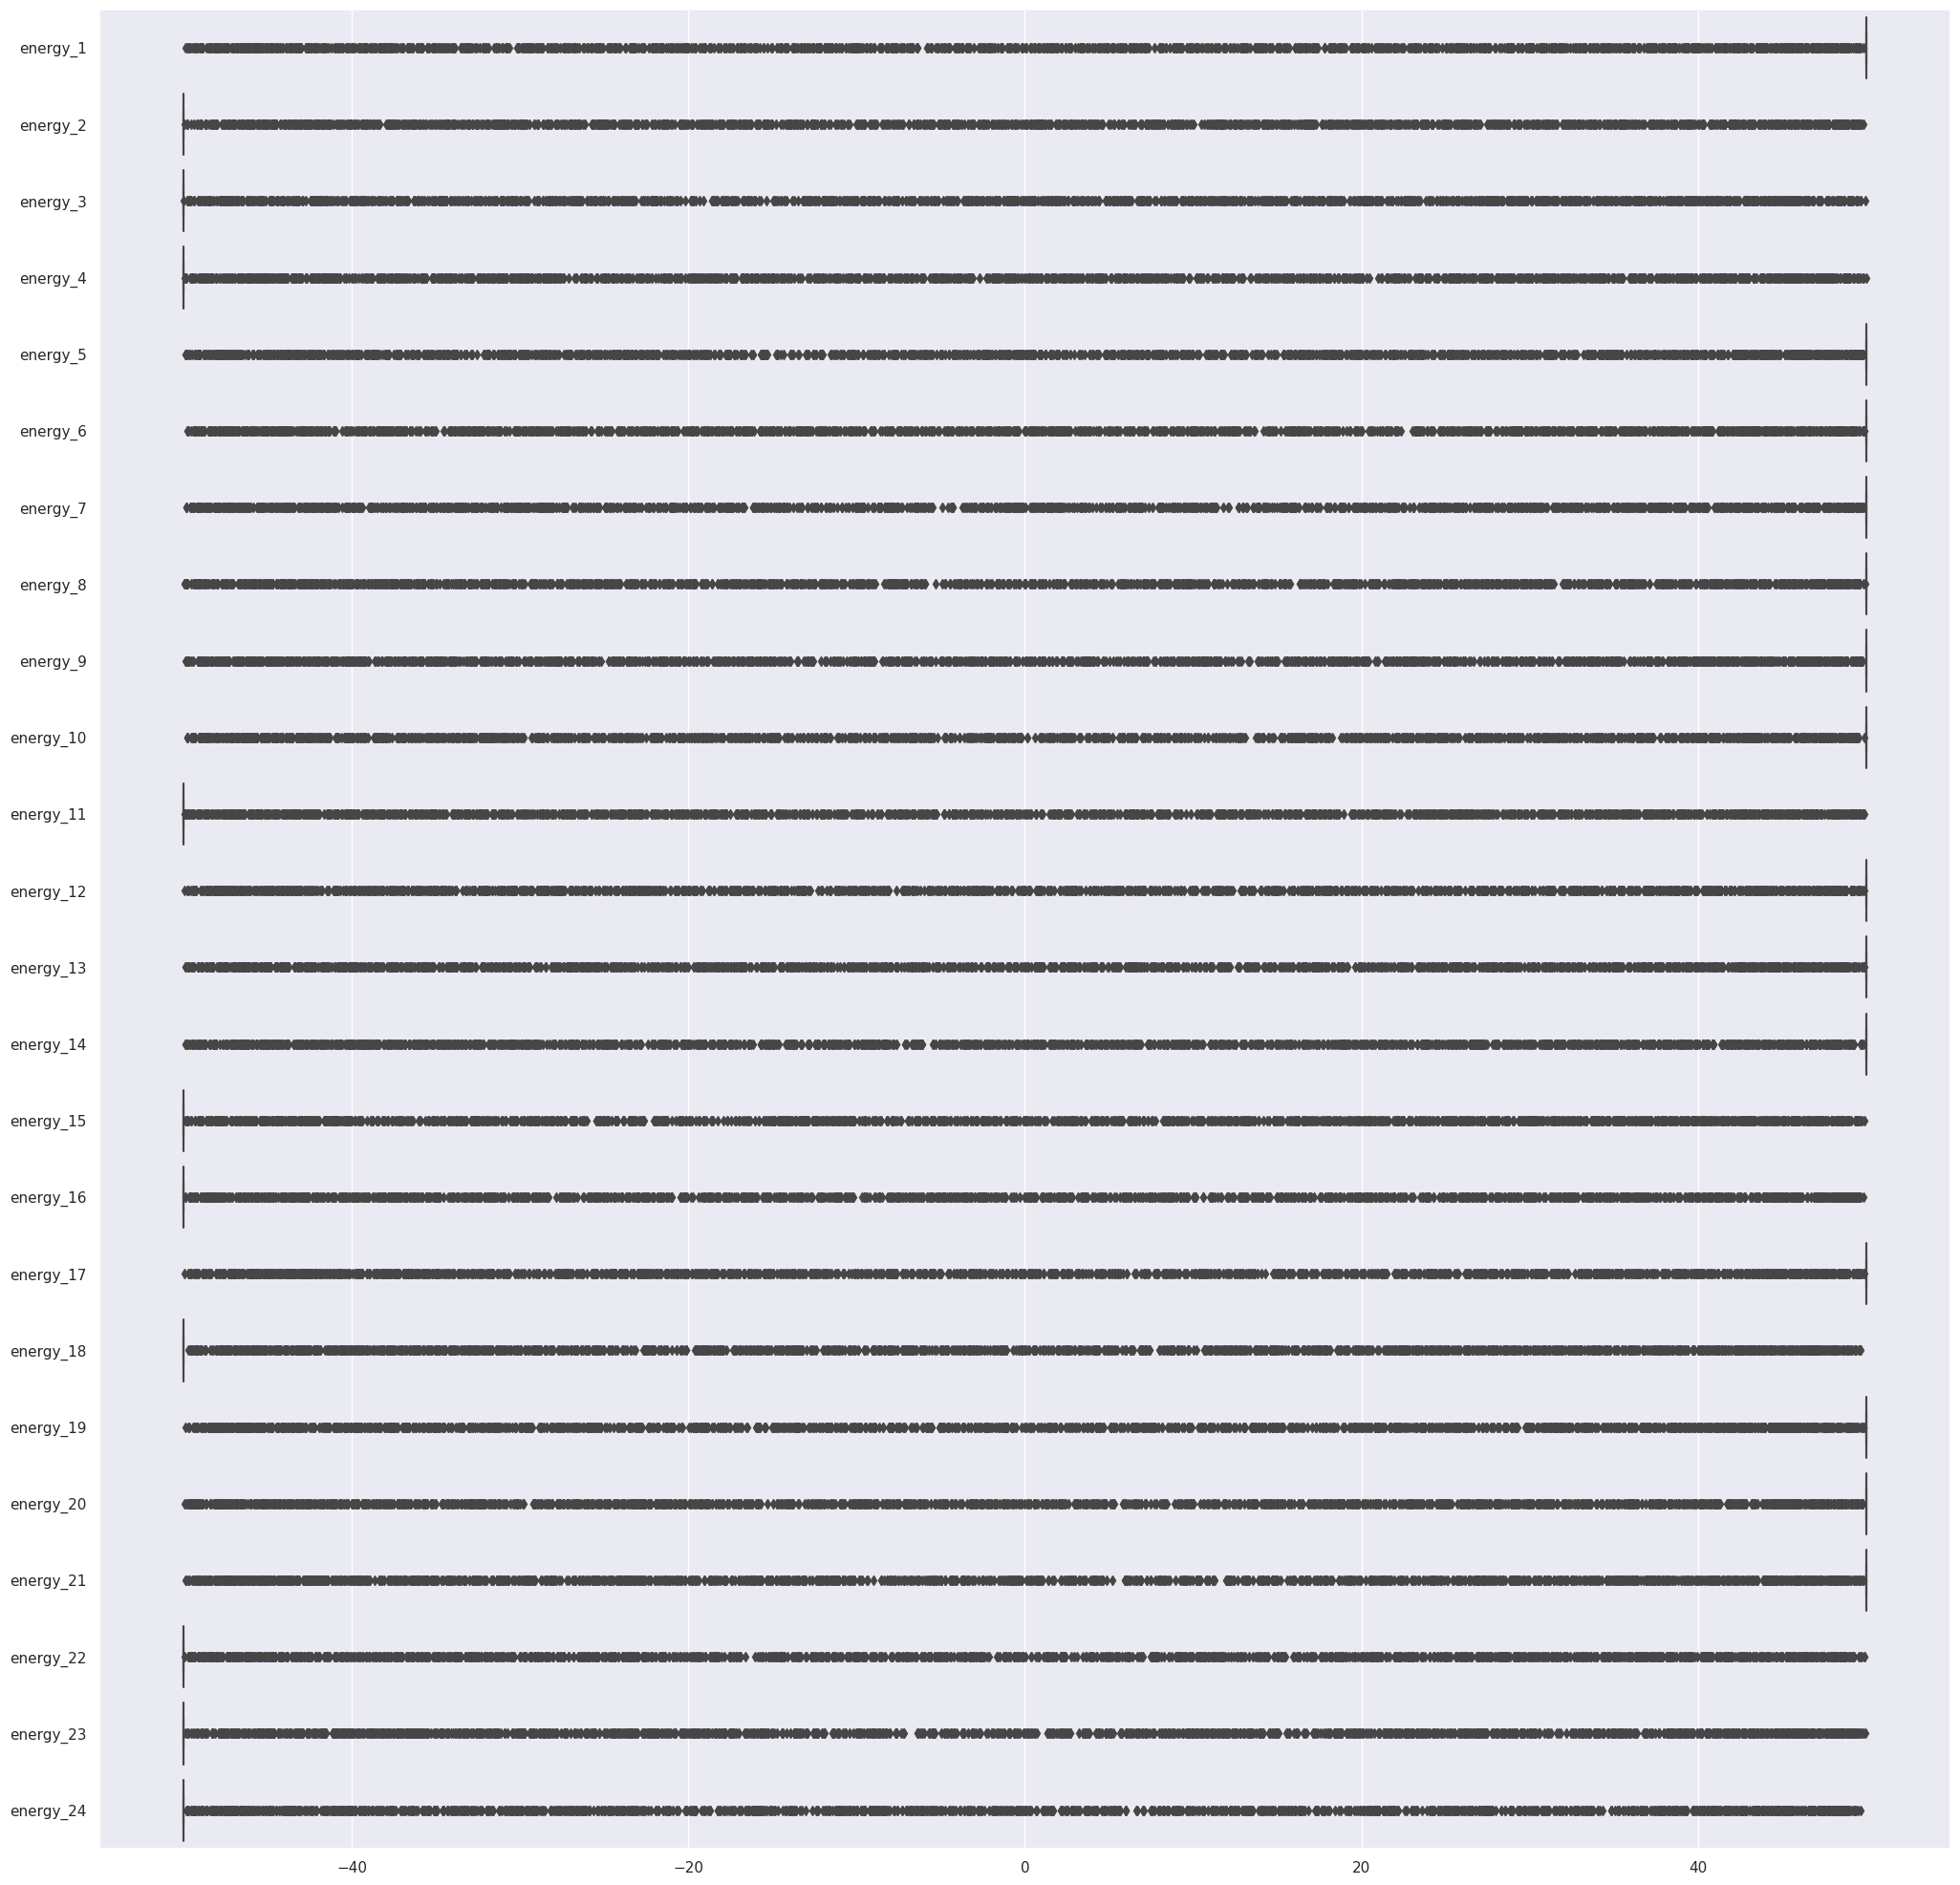

In [10]:
plot_args= {"cut": 0}
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df_action[energy], orient="h")

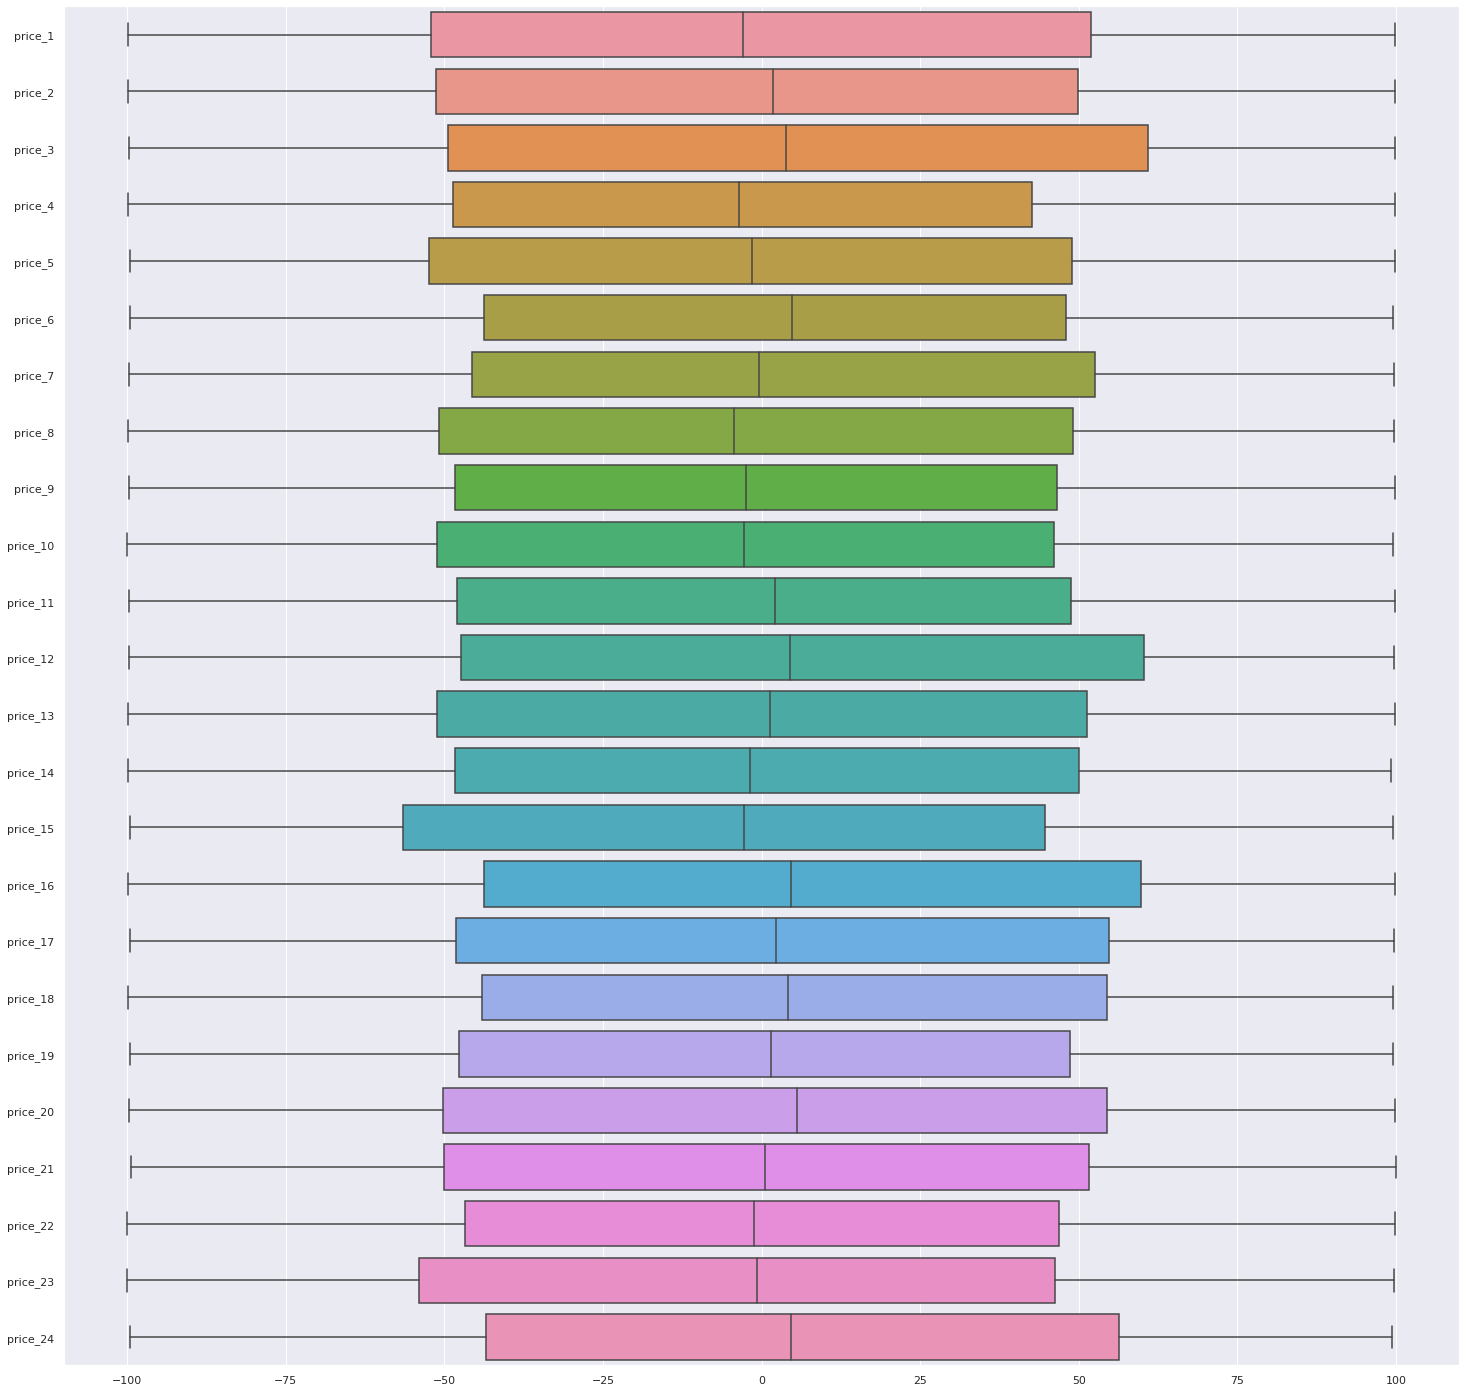

In [129]:
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df_action[price],  orient="h")

In [9]:

for i in range(0,24,1):
    print(df_action[df_action[price[i]] >=0])

       energy_1    price_1   energy_2    price_2   energy_3    price_3  \
1    -28.191140  43.358806 -40.279892   1.086572  47.160745  -3.075564   
2    -45.698315  26.638430  -6.041729  18.539274   6.329459 -57.839632   
5     -6.675696   7.322884  44.854015 -80.572939 -31.021747   0.285417   
7    -38.016224  68.290555  26.790118 -44.607735  32.452631 -52.829987   
8    -12.818134   5.473253 -42.234060  59.543854  -7.086116  90.343481   
...         ...        ...        ...        ...        ...        ...   
1575 -13.127136  53.999865  32.612675 -59.059072  38.862306 -95.384085   
1576 -40.509930  30.648762  32.281917 -10.223871 -12.412706  49.654418   
1577 -39.079142  85.866719  41.564173 -62.292087  17.950565 -14.461628   
1578 -46.726918  24.477085   9.616798 -95.736134 -11.607477  40.210718   
1581 -37.278274  54.346603  46.667349 -96.853983 -45.249289  73.675674   

       energy_4    price_4   energy_5    price_5  ...  energy_20   price_20  \
1     25.450945 -95.631695  40.3